In [1]:
import pandas as pd

In [2]:
EXP="exp1"

In [3]:
df_list = []
for i in range(10):
    tmp = pd.read_csv(f"{EXP}.{i}.csv", index_col=0)
    tmp["iter"] = tmp.index
    df_list.append(tmp)
df = (
    pd.concat(df_list)
    .melt(id_vars=["iter"])
)
QUESTION = "Does the agent know about Valentine's Day Party?"
df.columns = ["iter", "name", QUESTION]
df

,iter,name,Does the agent know about Valentine's Day Party?
0,0,Klaus Mueller,False
1,1,Klaus Mueller,True
2,2,Klaus Mueller,True
3,3,Klaus Mueller,True
4,4,Klaus Mueller,True
...,...,...,...
175,1,Isabella Rodriguez,True
176,2,Isabella Rodriguez,True
177,3,Isabella Rodriguez,True
178,4,Isabella Rodriguez,True


In [4]:
df = df.fillna(False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   iter                                              180 non-null    int64 
 1   name                                              180 non-null    object
 2   Does the agent know about Valentine's Day Party?  180 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

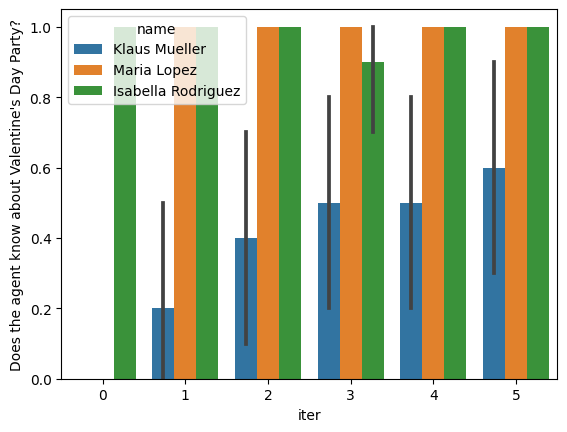

In [6]:
ax = sns.barplot(data=df, x="iter", y=QUESTION, hue="name")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper left")
plt.savefig(f"valentines_party{EXP}.png")